In [1]:
import numpy as np
import pandas as pd
import requests as requests
from io import StringIO
import csv
import os
from datetime import datetime
import pytz
from time import time
from time import sleep
import matplotlib.pyplot as plt

In [2]:
# Create empty dataframe
df = pd.DataFrame()

In [3]:
# Data pulling function from url, where we can find data about Berlin bikes thief record from 01/01/2021-up to today.
# The data are updated everyday or at least once a two/three day, so when we run function the date are expand on new records.

def data_pulling_function():
    global df
    url = "https://www.internetwache-polizei-berlin.de/vdb/Fahrraddiebstahl.csv"
    response = requests.get(url)
    df_raw = pd.read_csv(StringIO(response.text))
    local_time = datetime.now(pytz.timezone('Europe/Warsaw'))
    df = df.append(df_raw)
    pd.set_option('display.max_columns', None)
    print('Data updated - {}'.format(local_time.strftime("%Y-%m-%d %H:%M:%S")))
    return df

data_pulling_function()

Data updated - 2022-07-11 22:36:13


C:\Users\dell\AppData\Local\Temp/ipykernel_1064/3407847312.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_raw)


,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,10.07.2022,08.07.2022,9,08.07.2022,18,7400927,903,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,10.07.2022,04.07.2022,22,06.07.2022,19,12100204,799,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,10.07.2022,09.07.2022,23,10.07.2022,2,5100313,559,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,10.07.2022,09.07.2022,23,10.07.2022,8,7100103,3779,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
4,10.07.2022,09.07.2022,18,10.07.2022,8,1100416,2000,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
...,...,...,...,...,...,...,...,...,...,...,...
30443,02.01.2021,01.01.2021,1,01.01.2021,3,2100105,2000,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
30444,01.01.2021,01.01.2021,5,01.01.2021,8,10400941,2527,Nein,diverse Fahrräder,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
30445,01.01.2021,01.01.2021,17,01.01.2021,18,8401241,888,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern
30446,01.01.2021,01.01.2021,9,01.01.2021,11,4200206,290,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [4]:
# Change columns names

df.columns = ["Record_date", "Stealing_date", "Stealing_hour", "Report_stealing_date",
              "Report_stealing_hour", "Berlin_code_area", "Bike_value", "Unsuccesful_attempt",
              "Bike_type", "Crime_type", "Crime_reason"]

# Change category in Unsuccesful_attempt from to english

df["Unsuccesful_attempt"].replace({'Nein' : 'No', 'Ja' : 'Yes', 'Unbekannt' : 'Unknown'}, inplace=True)

# Merge two category Fahrrad and diverse Fahrrader as one category Bike and change column name to english

df["Bike_type"].replace({"Herrenfahrrad" : "Men", "Damenfahrrad" : "Women", "Fahrrad" : "Bike", "Mountainbike" : "Mountain",
                         "Kinderfahrrad" : "Child", "diverse Fahrräder" : "Bike", "Rennrad" : "Racing", "Lastenfahrrad" : "Cargo"}, inplace=True)

# Change column Crime_type vales for english

df["Crime_type"].replace(to_replace=["Fahrraddiebstahl", "Keller- und Bodeneinbruch"], value=["Theft", "Break-in"], inplace=True)

# Change type of category crime_reason to english
# Category "aggrevated theft" = theft with break-in, theft with robbery (aggresor has to use force) 

df["Crime_reason"].replace(to_replace=["Sonstiger schwerer Diebstahl von Fahrrädern", 
                                       "Einfacher Diebstahl von Fahrrädern",
                                       "Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern", 
                                       "Einfacher Diebstahl aus Keller/Boden von Fahrrädern"],
                           value=["Aggravated theft", "Theft", "Aggravated theft from basement/floor", "Theft from basement/floor"], inplace=True)

In [ ]:
## Creat three new columns (day, month, year) from one column (Record_date)
# Copy data frame to df_new
df_new = df.copy()

# Spliting column Record_date in orinigal data frame copy 
df_new_col = df_new["Record_date"].str.split('.', expand=True)

# Concatenation spliting new three row with copy dataframe
df_new_concat_2 = pd.concat([df_new, df_new_col], axis=1)

In [ ]:
# Moving three new columns for secound, third and fourth position in DataFrame
col_to_move = df_new_concat_2.pop(0)
col_to_move_1 = df_new_concat_2.pop(1)
col_to_move_2 = df_new_concat_2.pop(2)

df_new_concat_2.insert(1, 0, col_to_move)
df_new_concat_2.insert(2, 1, col_to_move_1)
df_new_concat_2.insert(3, 2, col_to_move_2)

In [ ]:
# Rename three new columns as: Record_day, Record_month, Record_year

df_new_concat_2.rename(columns={0: "Record_day", 1: "Record_month", 2 : "Record_year"}, inplace=True)

In [ ]:
# Display new dataframe

df_new_concat_2

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason
0,10.07.2022,10,07,2022,08.07.2022,9,08.07.2022,18,7400927,903,No,Men,Theft,Aggravated theft
1,10.07.2022,10,07,2022,04.07.2022,22,06.07.2022,19,12100204,799,No,Men,Theft,Aggravated theft
2,10.07.2022,10,07,2022,09.07.2022,23,10.07.2022,2,5100313,559,No,Men,Theft,Aggravated theft
3,10.07.2022,10,07,2022,09.07.2022,23,10.07.2022,8,7100103,3779,No,Men,Theft,Aggravated theft
4,10.07.2022,10,07,2022,09.07.2022,18,10.07.2022,8,1100416,2000,No,Bike,Theft,Aggravated theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,02.01.2021,02,01,2021,01.01.2021,1,01.01.2021,3,2100105,2000,No,Mountain,Theft,Aggravated theft
30444,01.01.2021,01,01,2021,01.01.2021,5,01.01.2021,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor
30445,01.01.2021,01,01,2021,01.01.2021,17,01.01.2021,18,8401241,888,No,Bike,Theft,Theft
30446,01.01.2021,01,01,2021,01.01.2021,9,01.01.2021,11,4200206,290,No,Women,Theft,Aggravated theft


In [ ]:
# Load data about LOR (Lebensweltlich orientierte Räume (LOR) = Spatial Planning Unit which contain columns: Berlin_code_area, 
#Administrative_districe, District, Quater, Street_name 

url = r"/content/drive/MyDrive/Berlin_code_area_dobuel_good.csv"
df_region = pd.read_csv(url, sep=';', encoding="ISO-8859-1")

df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Berlin_code_area         538 non-null    int64 
 1   Administrative_district  538 non-null    object
 2   District                 538 non-null    object
 3   Quarter                  538 non-null    object
 4   Streer_name              538 non-null    object
dtypes: int64(1), object(4)
memory usage: 21.1+ KB


In [ ]:
#Join two data frame (left join) with data and LOR information data

df_merge = pd.merge(df_new_concat_2, df_region, how='left', on='Berlin_code_area')

In [ ]:
# Duplicates inspection and deleting
df_merge.duplicated().value_counts()

False    30396
True        52
dtype: int64

In [ ]:
# Dispay dataframe after merging
df_merge

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Streer_name
0,10.07.2022,10,07,2022,08.07.2022,9,08.07.2022,18,7400927,903,No,Men,Theft,Aggravated theft,Tempelhof-Schöneberg,Tempelhof,Tempelhof Südost,Rathaus Tempelhof
1,10.07.2022,10,07,2022,04.07.2022,22,06.07.2022,19,12100204,799,No,Men,Theft,Aggravated theft,Reinickendorf,Reinickendorf Ost,Ost 2 - Alt-Reinickendorf,Schäfersee
2,10.07.2022,10,07,2022,09.07.2022,23,10.07.2022,2,5100313,559,No,Men,Theft,Aggravated theft,Spandau,Spandau Mitte / Nord,Spandau Mitte,Eiswerder
3,10.07.2022,10,07,2022,09.07.2022,23,10.07.2022,8,7100103,3779,No,Men,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Frobenstraße
4,10.07.2022,10,07,2022,09.07.2022,18,10.07.2022,8,1100416,2000,No,Bike,Theft,Aggravated theft,Mitte,Zentrum,Brunnenstraße Süd,Arkonaplatz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,02.01.2021,02,01,2021,01.01.2021,1,01.01.2021,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
30444,01.01.2021,01,01,2021,01.01.2021,5,01.01.2021,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
30445,01.01.2021,01,01,2021,01.01.2021,17,01.01.2021,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel
30446,01.01.2021,01,01,2021,01.01.2021,9,01.01.2021,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee


In [ ]:
df_merge['Record_date'] = pd.to_datetime(df['Record_date'])

In [ ]:
df_merge['Record_day_of_week'] = df_merge['Record_date'].dt.day_name()

In [ ]:
first_column = df_merge.pop('Record_day_of_week')
  
df_merge.insert(4, 'Record_day_of_week', first_column)

In [ ]:
df_merge

,Record_date,Record_day,Record_month,Record_year,Record_day_of_week,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Streer_name
0,2022-10-07,10,07,2022,Friday,08.07.2022,9,08.07.2022,18,7400927,903,No,Men,Theft,Aggravated theft,Tempelhof-Schöneberg,Tempelhof,Tempelhof Südost,Rathaus Tempelhof
1,2022-10-07,10,07,2022,Friday,04.07.2022,22,06.07.2022,19,12100204,799,No,Men,Theft,Aggravated theft,Reinickendorf,Reinickendorf Ost,Ost 2 - Alt-Reinickendorf,Schäfersee
2,2022-10-07,10,07,2022,Friday,09.07.2022,23,10.07.2022,2,5100313,559,No,Men,Theft,Aggravated theft,Spandau,Spandau Mitte / Nord,Spandau Mitte,Eiswerder
3,2022-10-07,10,07,2022,Friday,09.07.2022,23,10.07.2022,8,7100103,3779,No,Men,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Frobenstraße
4,2022-10-07,10,07,2022,Friday,09.07.2022,18,10.07.2022,8,1100416,2000,No,Bike,Theft,Aggravated theft,Mitte,Zentrum,Brunnenstraße Süd,Arkonaplatz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,2021-02-01,02,01,2021,Monday,01.01.2021,1,01.01.2021,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
30444,2021-01-01,01,01,2021,Friday,01.01.2021,5,01.01.2021,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
30445,2021-01-01,01,01,2021,Friday,01.01.2021,17,01.01.2021,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel
30446,2021-01-01,01,01,2021,Friday,01.01.2021,9,01.01.2021,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee


In [ ]:
df_merge.groupby('Record_day_of_week')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day_of_week,
Monday,5109
Tuesday,4660
Wednesday,4596
Thursday,4394
Friday,4202
Sunday,3757
Saturday,3730


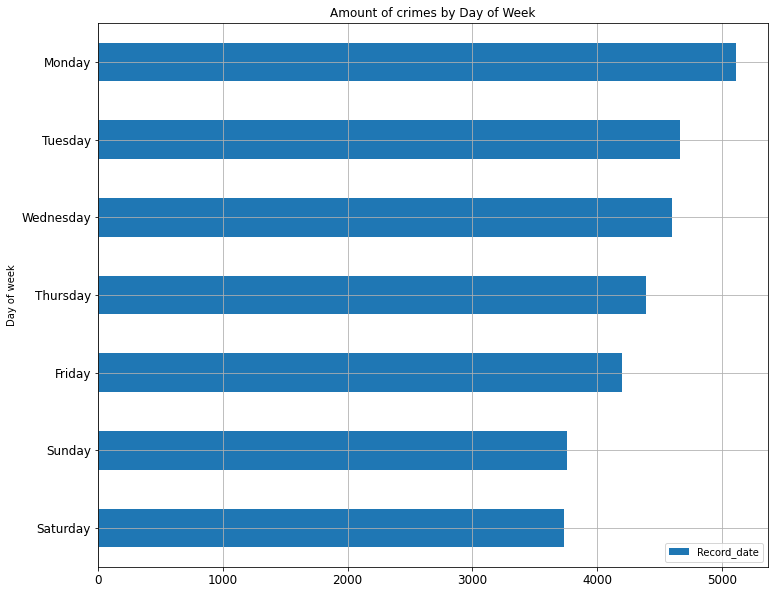

In [ ]:
df_merge.groupby('Record_day_of_week')[['Record_date']].count().sort_values(by='Record_date', ascending=True).plot(kind='barh',
                                                                                                                   figsize=(12,10),
                                                                                                                   fontsize=12,
                                                                                                                   title='Amount of crimes by Day of Week',
                                                                                                                   xlabel='Day of week',
                                                                                                                   grid=True)
                                                                                                                  

In [ ]:
df_merge.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,4826
Mitte,4279
Friedrichshain-Kreuzberg,4205
Charlottenburg-Wilmersdorf,3356
Tempelhof-Schöneberg,2529
Treptow-Köpenick,2395
Neukölln,2377
Steglitz-Zehlendorf,1915
Lichtenberg,1709


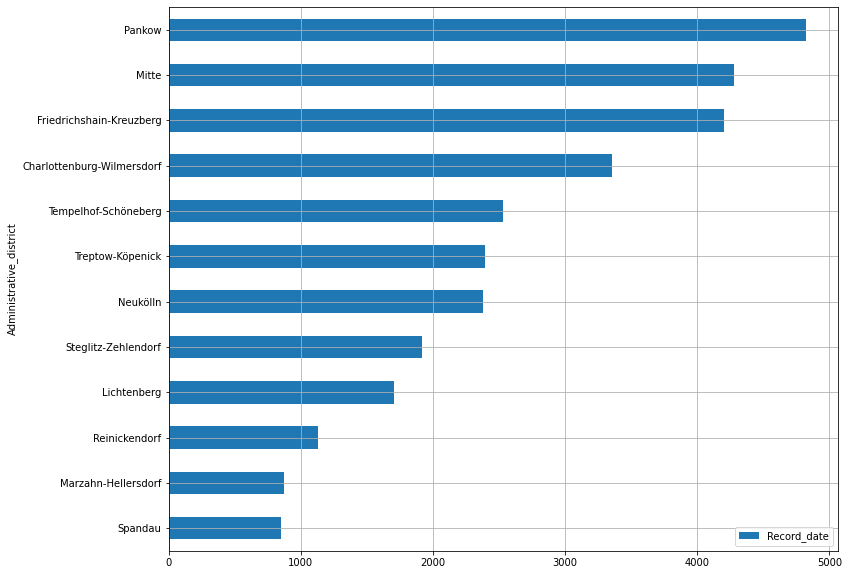

In [ ]:
df_merge.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=True).plot(kind='barh',
                                                                                                                          figsize=(12,10),
                                                                                                                          grid=True)

In [ ]:
df_merge.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,13991
Women,8899
Bike,4533
Mountain,1338
Child,1223
Racing,419
Cargo,45


In [ ]:
df_merge.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,29133
Break-in,1315
